<a href="https://colab.research.google.com/github/FrancisKurian/CS530/blob/main/Naive_Bayes_Play_Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
#files.upload()

Saving tennis.csv to tennis.csv


In [2]:
import numpy as np
import pandas as pd
df_tennis = pd.read_csv('tennis.csv')
df_tennis

,Outlook,Temp.,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


#Function to list the columns in training datasets, calculate probability at class level

In [3]:
def prob_lookup(df,target):
  df_prob2 = pd.DataFrame()
  for (columnName) in df:
    if not columnName==target:
      df_ct = pd.crosstab(df[columnName], df[target], margins = True)
      class_list = list(df_ct.index.values)[:-1] +["coltotal"]
      df_ct.index= [class_list]
      rcount=len(df_ct.index)
      df_prob0=df_ct / df_ct.iloc[rcount-1]
      df_prob=df_prob0[0:rcount-1]
      df_prob=df_prob.reset_index().iloc[: , :-1]
      df_prob2=df_prob2.append(df_prob,ignore_index=True)
  return  df_prob2

In [11]:
outcome= 'Play'
df_p=prob_lookup(df_tennis,outcome)

In [12]:
print(df_p)

Play   level_0   no       yes
0     overcast  0.0  0.444444
1        rainy  0.4  0.333333
2        sunny  0.6  0.222222
3         cool  0.2  0.333333
4          hot  0.4  0.222222
5         mild  0.4  0.444444
6         high  0.8  0.333333
7       normal  0.2  0.666667
8       false   0.4  0.666667
9        true   0.6  0.333333


In [14]:
df_t = df_tennis
header = df_t.columns[0:4].to_list()
p_header=['Prob_'+ j for j in header]

In [15]:
p_header

['Prob_Outlook', 'Prob_Temp.', 'Prob_Humidity', 'Prob_Windy']

In [24]:
def prob_calc_new(x):
        Prob_yes=1
        Prob_no=1
        prob_dict_yes={}
        prob_dict_no={}
        
        for i in range (0,len(header)):
                
                prob_val=df_p.loc[df_p['level_0']==x[i]]
              
                #probablity of Prob_col = probablity based on the argument sent in
                prob_dict_yes={p_header[i]:prob_val['yes'].values[0]}
                prob_dict_no={p_header[i]:prob_val['no'].values[0]}

                for keys,values in prob_dict_yes.items():
                      Prob_yes = Prob_yes * values
                
                for keys,values in prob_dict_no.items():
                      Prob_no = Prob_no * values
        
                Prob_normal_yes = Prob_yes/(Prob_yes + Prob_no)
                # Prob_normal_no = Prob_no/(Prob_yes + Prob_no)
                
                if Prob_normal_yes >= 0.5:
                    will_play='Yes'
                else:
                    will_play='No'
                    
        return(Prob_normal_yes,will_play)

In [25]:
df_t[['Prob_normal_yes','will_play']]=df_t.apply(prob_calc_new,axis=1,result_type='expand')

In [26]:
df_t

,Outlook,Temp.,Humidity,Windy,Play,Prob_normal_yes,will_play
0,sunny,hot,high,false,no,0.125025,No
1,sunny,hot,high,true,no,0.045464,No
2,overcast,hot,high,false,yes,1.000000,Yes
3,rainy,mild,high,false,yes,0.391359,No
4,rainy,cool,normal,false,yes,0.885269,Yes
5,rainy,cool,normal,true,no,0.720046,Yes
6,overcast,cool,normal,true,yes,1.000000,Yes
7,sunny,mild,high,false,no,0.222262,No
8,sunny,cool,normal,false,yes,0.774234,Yes
9,rainy,mild,normal,false,yes,0.837240,Yes


#confusion matrix and accuracy

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_tennis.Play=='yes', df_t.will_play =='Yes')

array([[4, 1],
       [2, 7]])


# matthews correlation coef.


In [29]:

from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(df_tennis.Play=='yes', df_t.will_play =='Yes')


0.5594309277855158

#ROC

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [32]:
fpr, tpr, threshs = roc_curve(df_tennis.Play=='yes', df_t.will_play =='Yes')
roc_auc = auc(fpr, tpr)

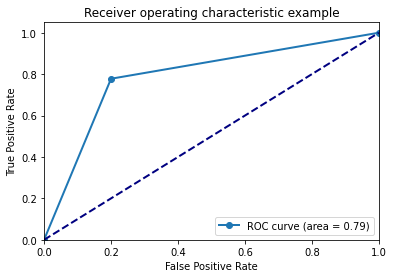

In [33]:
plt.plot(
    fpr,
    tpr,
    'o-',
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc,   
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()